In [6]:
import pandas as pd
import numpy as np
rankeds = pd.read_csv('high_diamond_ranked_10min_cutted.csv')

### Wstępna analiza danych

In [7]:
rankeds.columns

Index(['Unnamed: 0', 'blueWins', 'blueWardsPlaced', 'blueKills', 'blueDeaths',
       'blueAssists', 'blueTotalGold', 'blueTotalMinionsKilled'],
      dtype='object')

In [8]:
rankeds.head(10)

,Unnamed: 0,blueWins,blueWardsPlaced,blueKills,blueDeaths,blueAssists,blueTotalGold,blueTotalMinionsKilled
0,0,0,28,9,6,11,17210,195
1,1,0,12,5,5,5,14712,174
2,2,0,15,7,11,4,16113,186
3,3,0,43,4,5,5,15157,201
4,4,0,75,6,6,6,16400,210
5,5,1,18,5,3,6,15899,225
6,6,1,18,7,6,7,16874,225
7,7,0,16,5,13,3,15305,209
8,8,0,16,7,7,8,16401,189
9,9,1,13,4,5,5,15057,220


In [9]:
rankeds.describe()

,Unnamed: 0,blueWins,blueWardsPlaced,blueKills,blueDeaths,blueAssists,blueTotalGold,blueTotalMinionsKilled
count,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000
mean,4939.000000,0.499038,22.288288,6.183925,6.137666,6.645106,16503.455512,216.699565
std,2851.965989,0.500024,18.019177,3.011028,2.933818,4.064520,1535.446636,21.858437
min,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,10730.000000,90.000000
25%,2469.500000,0.000000,14.000000,4.000000,4.000000,4.000000,15415.500000,202.000000
50%,4939.000000,0.000000,16.000000,6.000000,6.000000,6.000000,16398.000000,218.000000
75%,7408.500000,1.000000,20.000000,8.000000,8.000000,9.000000,17459.000000,232.000000
max,9878.000000,1.000000,250.000000,22.000000,22.000000,29.000000,23701.000000,283.000000


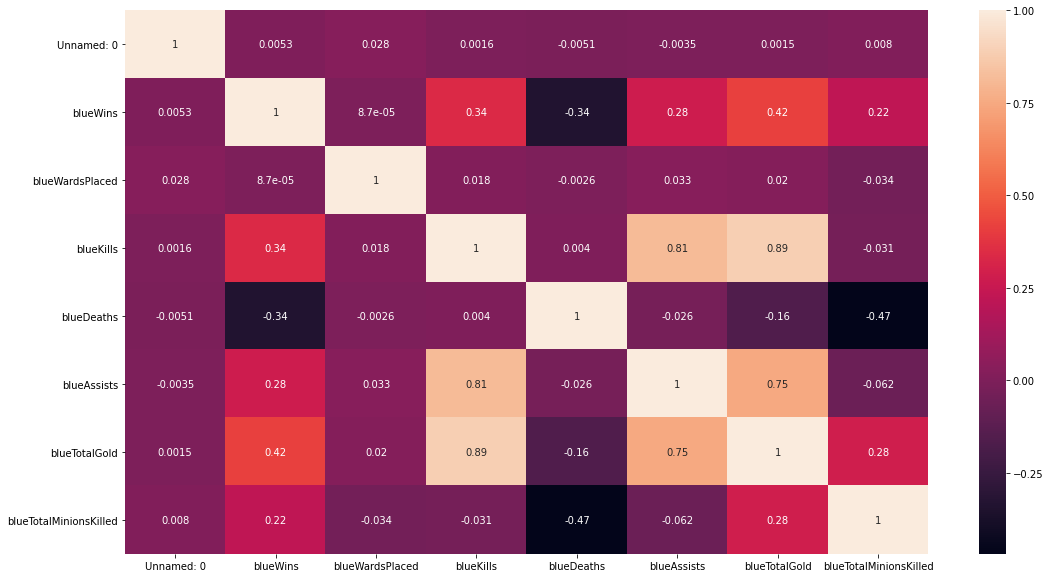

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 10))

corr = rankeds.corr()
sns.heatmap(corr,
xticklabels=corr.columns.values,
yticklabels=corr.columns.values, annot=True )


### Wykresy zależności

Text(0.5, 1.0, 'Zależność posiadanego złota od zabójstw')

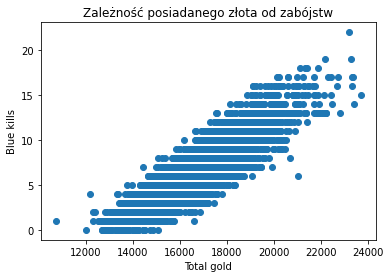

In [11]:
plt.scatter(rankeds['blueTotalGold'], rankeds['blueKills'])
plt.xlabel('Total gold')
plt.ylabel('Blue kills')
plt.title('Zależność posiadanego złota od zabójstw')

Text(0.5, 1.0, 'Zależność złota od śmierci')

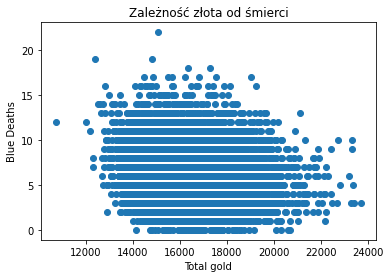

In [12]:
plt.scatter(rankeds['blueTotalGold'], rankeds['blueDeaths'])
plt.xlabel('Total gold')
plt.ylabel('Blue Deaths')
plt.title('Zależność złota od śmierci')

Text(0.5, 1.0, 'Zależność zabójstw od stawiania wardów')

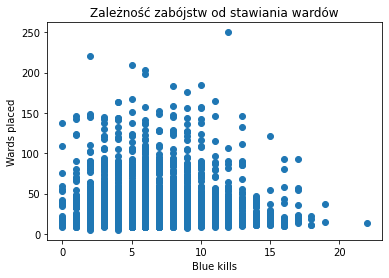

In [13]:
plt.scatter(rankeds['blueKills'], rankeds['blueWardsPlaced'])
plt.xlabel('Blue kills')
plt.ylabel('Wards placed')
plt.title('Zależność zabójstw od stawiania wardów')

### Histogramy

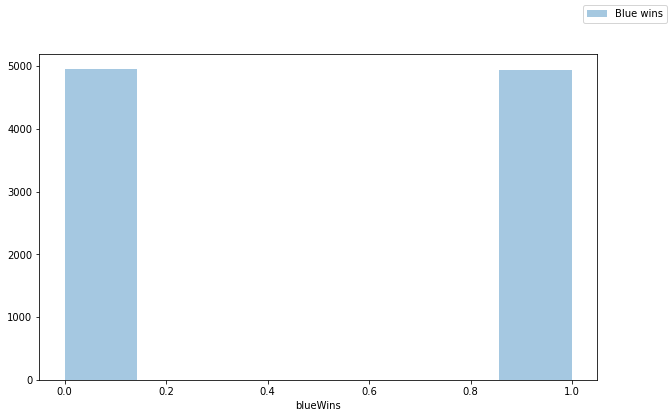

In [14]:
fig = plt.figure(figsize=(10,6))
sns.distplot(rankeds['blueWins'], label='Blue wins', bins=7,  kde=False)
fig.legend(labels=['Blue wins'])

plt.show()

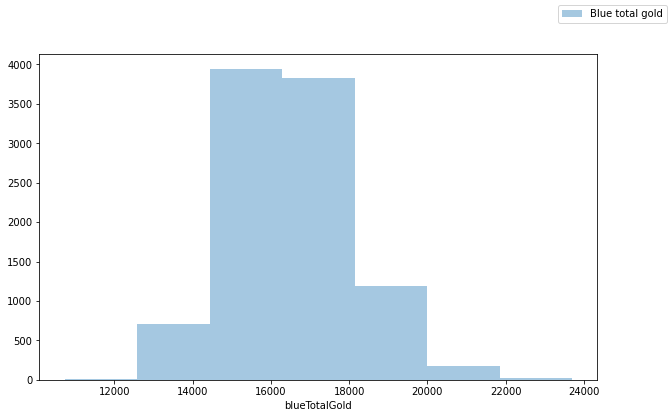

In [15]:

fig = plt.figure(figsize=(10,6))
sns.distplot(rankeds['blueTotalGold'], label='Blue total gold', bins=7,  kde=False)
fig.legend(labels=['Blue total gold'])

plt.show()


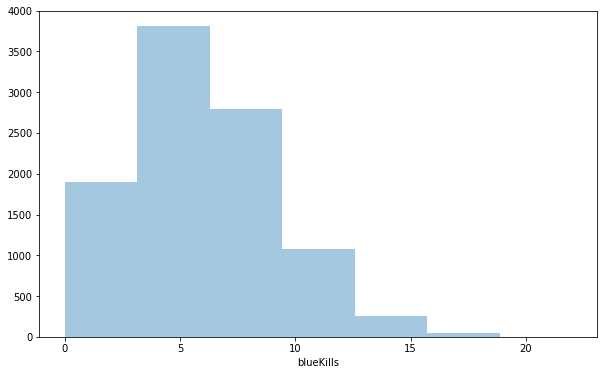

In [16]:
fig = plt.figure(figsize=(10,6))
sns.distplot(rankeds['blueKills'], label='Blue kills', bins=7,  kde=False)

plt.show()

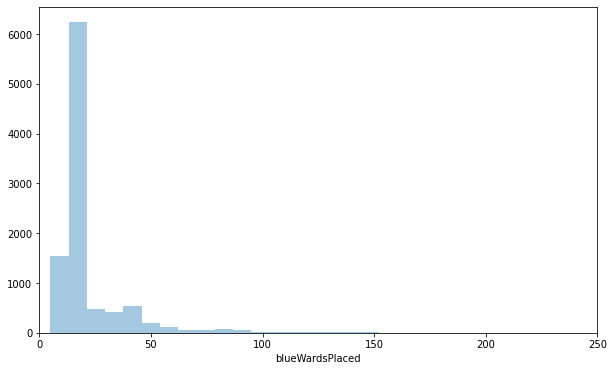

In [17]:
fig = plt.figure(figsize=(10,6))
plt.xlim(0, rankeds['blueWardsPlaced'].max())
sns.distplot(rankeds['blueWardsPlaced'], label='Blue kills', bins=30,  kde=False)

plt.show()

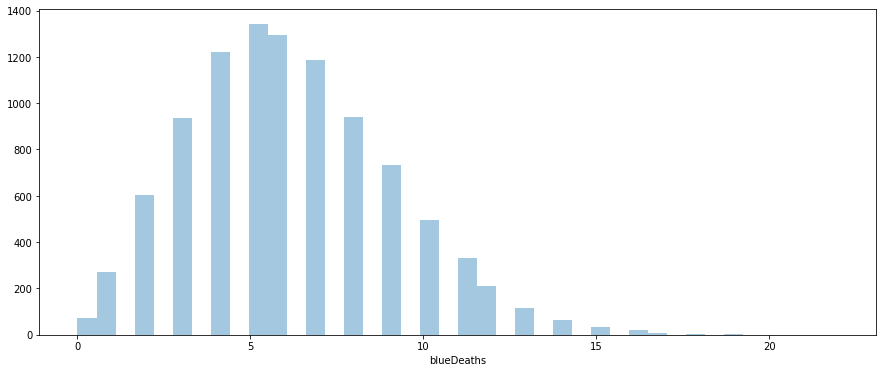

In [18]:

fig = plt.figure(figsize=(15,6))
sns.distplot(rankeds['blueDeaths'], label='Blue deaths', bins=40,  kde=False)

plt.show()

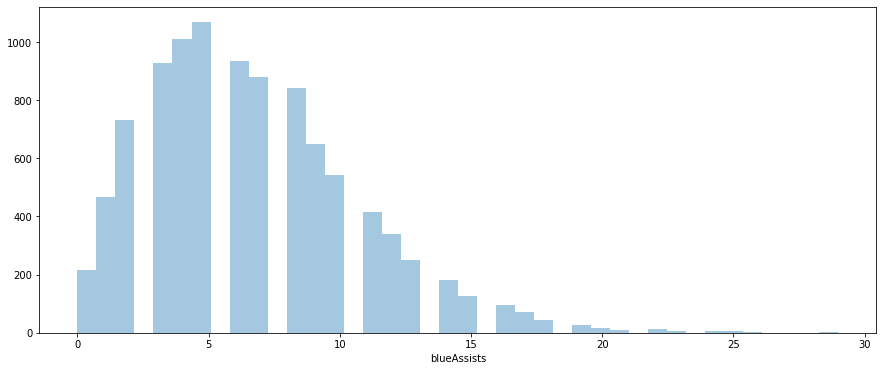

In [19]:

fig = plt.figure(figsize=(15,6))
sns.distplot(rankeds['blueAssists'], label='Blue assissts', bins=40,  kde=False)

plt.show()

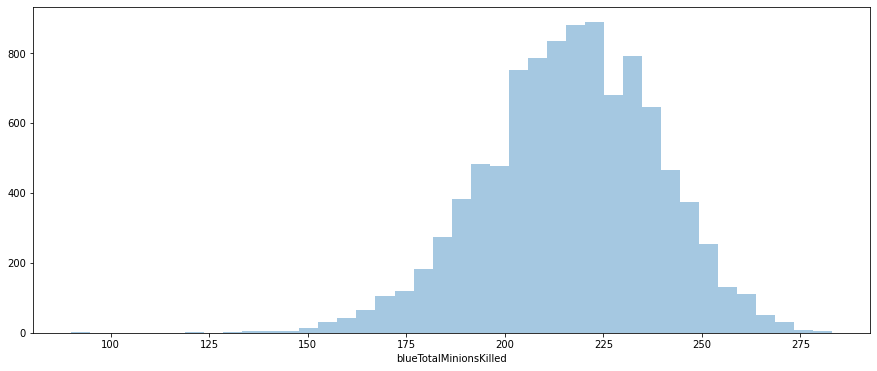

In [20]:

fig = plt.figure(figsize=(15,6))
sns.distplot(rankeds['blueTotalMinionsKilled'], label='Blue assissts', bins=40,  kde=False)

plt.show()

### Odległość euklidesowa


In [21]:
# funkcja pomocnicza
def euclidean_distance(row1, row2):
    return np.linalg.norm(row1 - row2)

In [22]:
euclidean_distance(rankeds.loc[0], rankeds.loc[1])

2498.150315733623

In [23]:
print(rankeds.loc[0])
print(rankeds.loc[1])

Unnamed: 0                    0
blueWins                      0
blueWardsPlaced              28
blueKills                     9
blueDeaths                    6
blueAssists                  11
blueTotalGold             17210
blueTotalMinionsKilled      195
Name: 0, dtype: int64
Unnamed: 0                    1
blueWins                      0
blueWardsPlaced              12
blueKills                     5
blueDeaths                    5
blueAssists                   5
blueTotalGold             14712
blueTotalMinionsKilled      174
Name: 1, dtype: int64


### Standaryzacja danych za pomocą StandardScaler

In [24]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
rankeds_standarized = pd.DataFrame(scaler.fit_transform(rankeds), columns = rankeds.columns)
rankeds_standarized.head()

,Unnamed: 0,blueWins,blueWardsPlaced,blueKills,blueDeaths,blueAssists,blueTotalGold,blueTotalMinionsKilled
0,-1.731875,-0.998079,0.316996,0.935301,-0.046926,1.071495,0.460179,-0.992782
1,-1.731525,-0.998079,-0.570992,-0.393216,-0.387796,-0.404768,-1.166792,-1.953558
2,-1.731174,-0.998079,-0.404494,0.271042,1.657424,-0.650812,-0.254307,-1.404543
3,-1.730824,-0.998079,1.149484,-0.725346,-0.387796,-0.404768,-0.876959,-0.718275
4,-1.730473,-0.998079,2.925460,-0.061087,-0.046926,-0.158724,-0.067382,-0.306513


In [25]:
scaler.mean_

array([4.93900000e+03, 4.99038364e-01, 2.22882883e+01, 6.18392550e+00,
       6.13766576e+00, 6.64510578e+00, 1.65034555e+04, 2.16699565e+02])

In [26]:
scaler.scale_

array([2.85182164e+03, 4.99999075e-01, 1.80182645e+01, 3.01087558e+00,
       2.93366922e+00, 4.06431418e+00, 1.53536892e+03, 2.18573310e+01])

In [27]:
#po standaryzacji
euclidean_distance(rankeds_standarized.loc[0], rankeds_standarized.loc[1])

2.901577419722917

In [28]:
print(rankeds_standarized.loc[0], rankeds_standarized.loc[1])

Unnamed: 0               -1.731875
blueWins                 -0.998079
blueWardsPlaced           0.316996
blueKills                 0.935301
blueDeaths               -0.046926
blueAssists               1.071495
blueTotalGold             0.460179
blueTotalMinionsKilled   -0.992782
Name: 0, dtype: float64 Unnamed: 0               -1.731525
blueWins                 -0.998079
blueWardsPlaced          -0.570992
blueKills                -0.393216
blueDeaths               -0.387796
blueAssists              -0.404768
blueTotalGold            -1.166792
blueTotalMinionsKilled   -1.953558
Name: 1, dtype: float64


### Analiza modeli k-means dla zakresu n = (2,15)


In [29]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score

k_clusters = []
inertia = []
silhouette = []
calinski = []

for k in range(2,15):
    km = KMeans(n_clusters = k)
    km.fit(rankeds_standarized)
    
    k_clusters.append(k)
    silhouette.append(silhouette_score(rankeds_standarized, km.labels_))
    calinski.append(calinski_harabasz_score(rankeds_standarized, km.labels_))
    inertia.append(km.inertia_)
    


Text(0, 0.5, 'Silhouette coefficient')

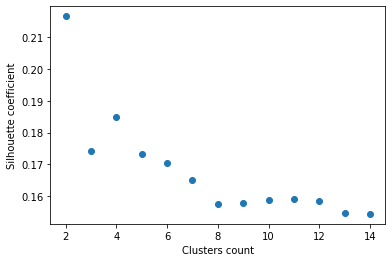

In [30]:
plt.scatter(k_clusters, silhouette)
plt.xlabel('Clusters count')
plt.ylabel('Silhouette coefficient')


Text(0, 0.5, 'Calinski-Harabasz score')

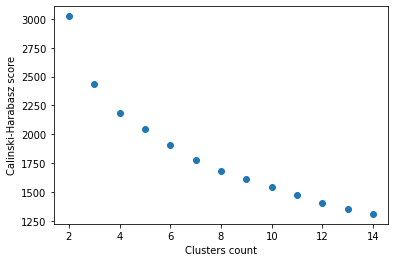

In [31]:
plt.scatter(k_clusters, calinski)
plt.xlabel('Clusters count')
plt.ylabel('Calinski-Harabasz score')

Text(0, 0.5, 'Inertia')

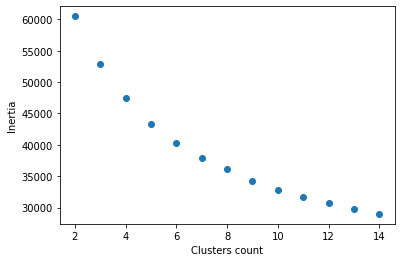

In [32]:
plt.scatter(k_clusters, inertia)
plt.xlabel('Clusters count')
plt.ylabel('Inertia')

In [33]:
k2 = KMeans(n_clusters=2)
k2.fit(rankeds_standarized)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [34]:
pd.DataFrame(scaler.inverse_transform(k2.cluster_centers_), columns=rankeds_standarized.columns)

,Unnamed: 0,blueWins,blueWardsPlaced,blueKills,blueDeaths,blueAssists,blueTotalGold,blueTotalMinionsKilled
0,4915.256807,0.793955,22.958699,8.644439,5.410706,9.700738,17802.738348,221.006461
1,4957.557800,0.268530,21.764292,4.260775,6.705861,4.256808,15487.929486,213.333273


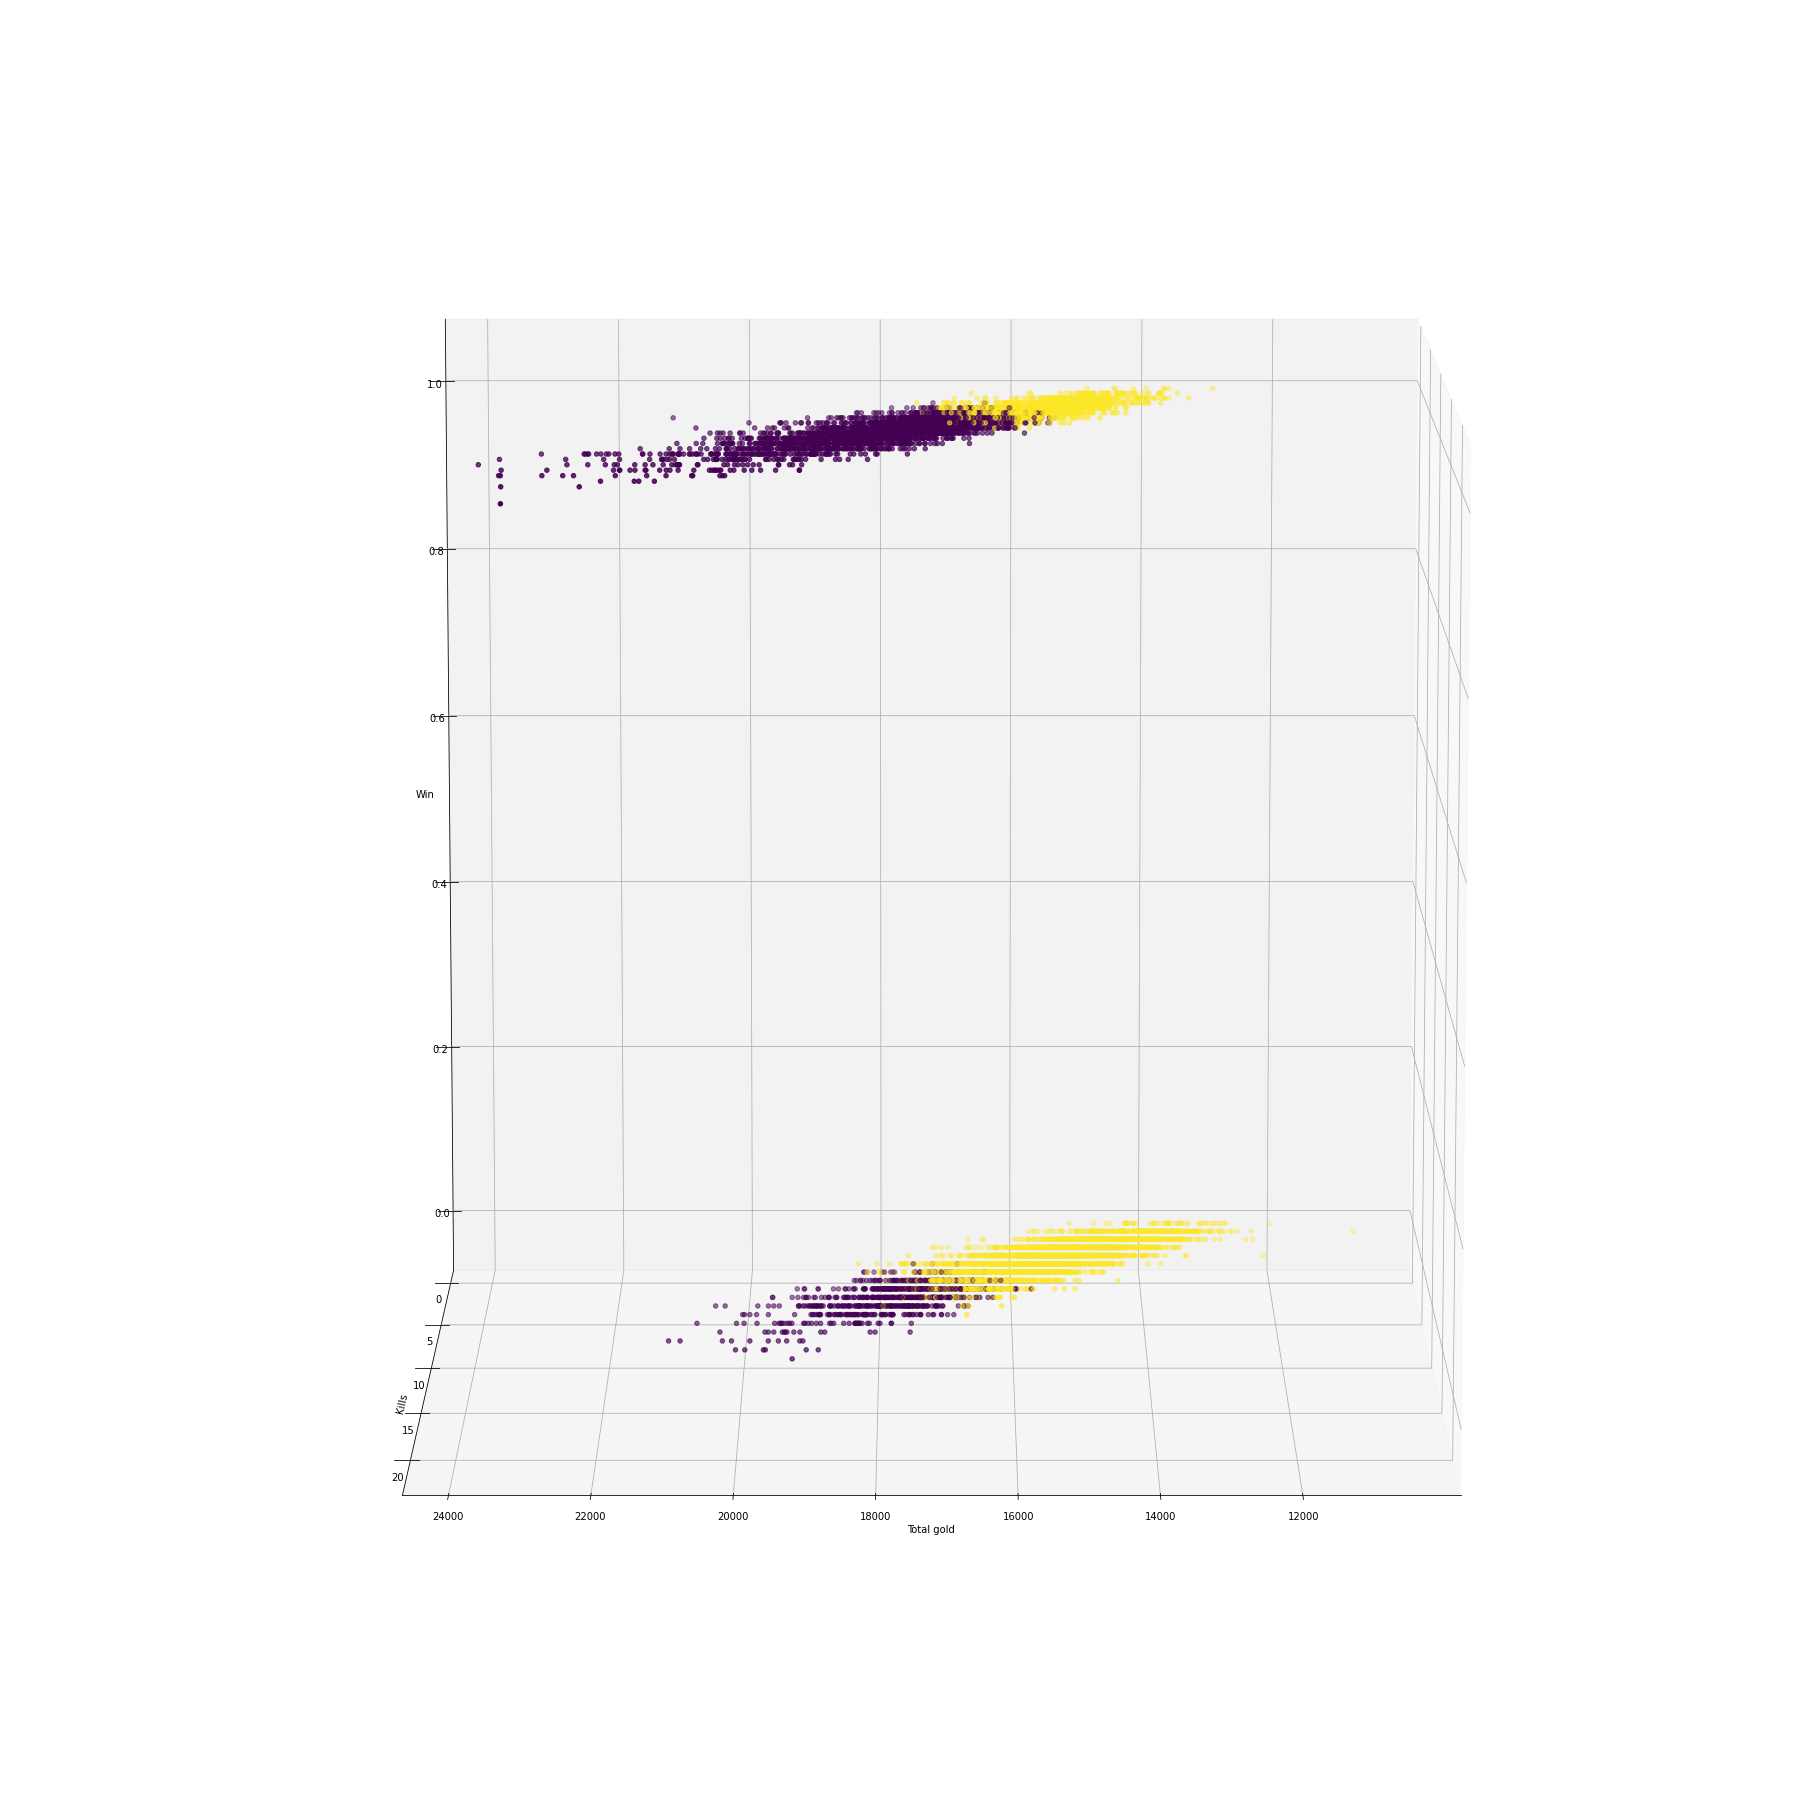

In [35]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(25,25))
ax = Axes3D(fig)
ax.scatter(rankeds['blueTotalGold'], rankeds['blueKills'], rankeds['blueWins'], c=k2.labels_)
ax.set_xlabel('Total gold')
ax.set_ylabel('Kills')
ax.set_zlabel('Win')
ax.view_init(10, 90)
plt.show()

In [36]:
km = KMeans(n_clusters=4)
km.fit(rankeds_standarized)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [37]:
pd.DataFrame(scaler.inverse_transform(km.cluster_centers_), columns=rankeds_standarized.columns)

,Unnamed: 0,blueWins,blueWardsPlaced,blueKills,blueDeaths,blueAssists,blueTotalGold,blueTotalMinionsKilled
0,4983.264847,0.999631,21.791959,5.241239,4.459978,5.221321,16320.271118,226.533014
1,4901.240831,0.800326,22.955990,9.999185,5.676854,11.554605,18395.271801,218.687449
2,4867.044874,0.000387,21.744294,4.015087,5.519149,4.110638,15572.222437,223.483946
3,5013.524659,0.119775,22.811179,5.620009,9.556130,5.876468,15686.796618,193.649131


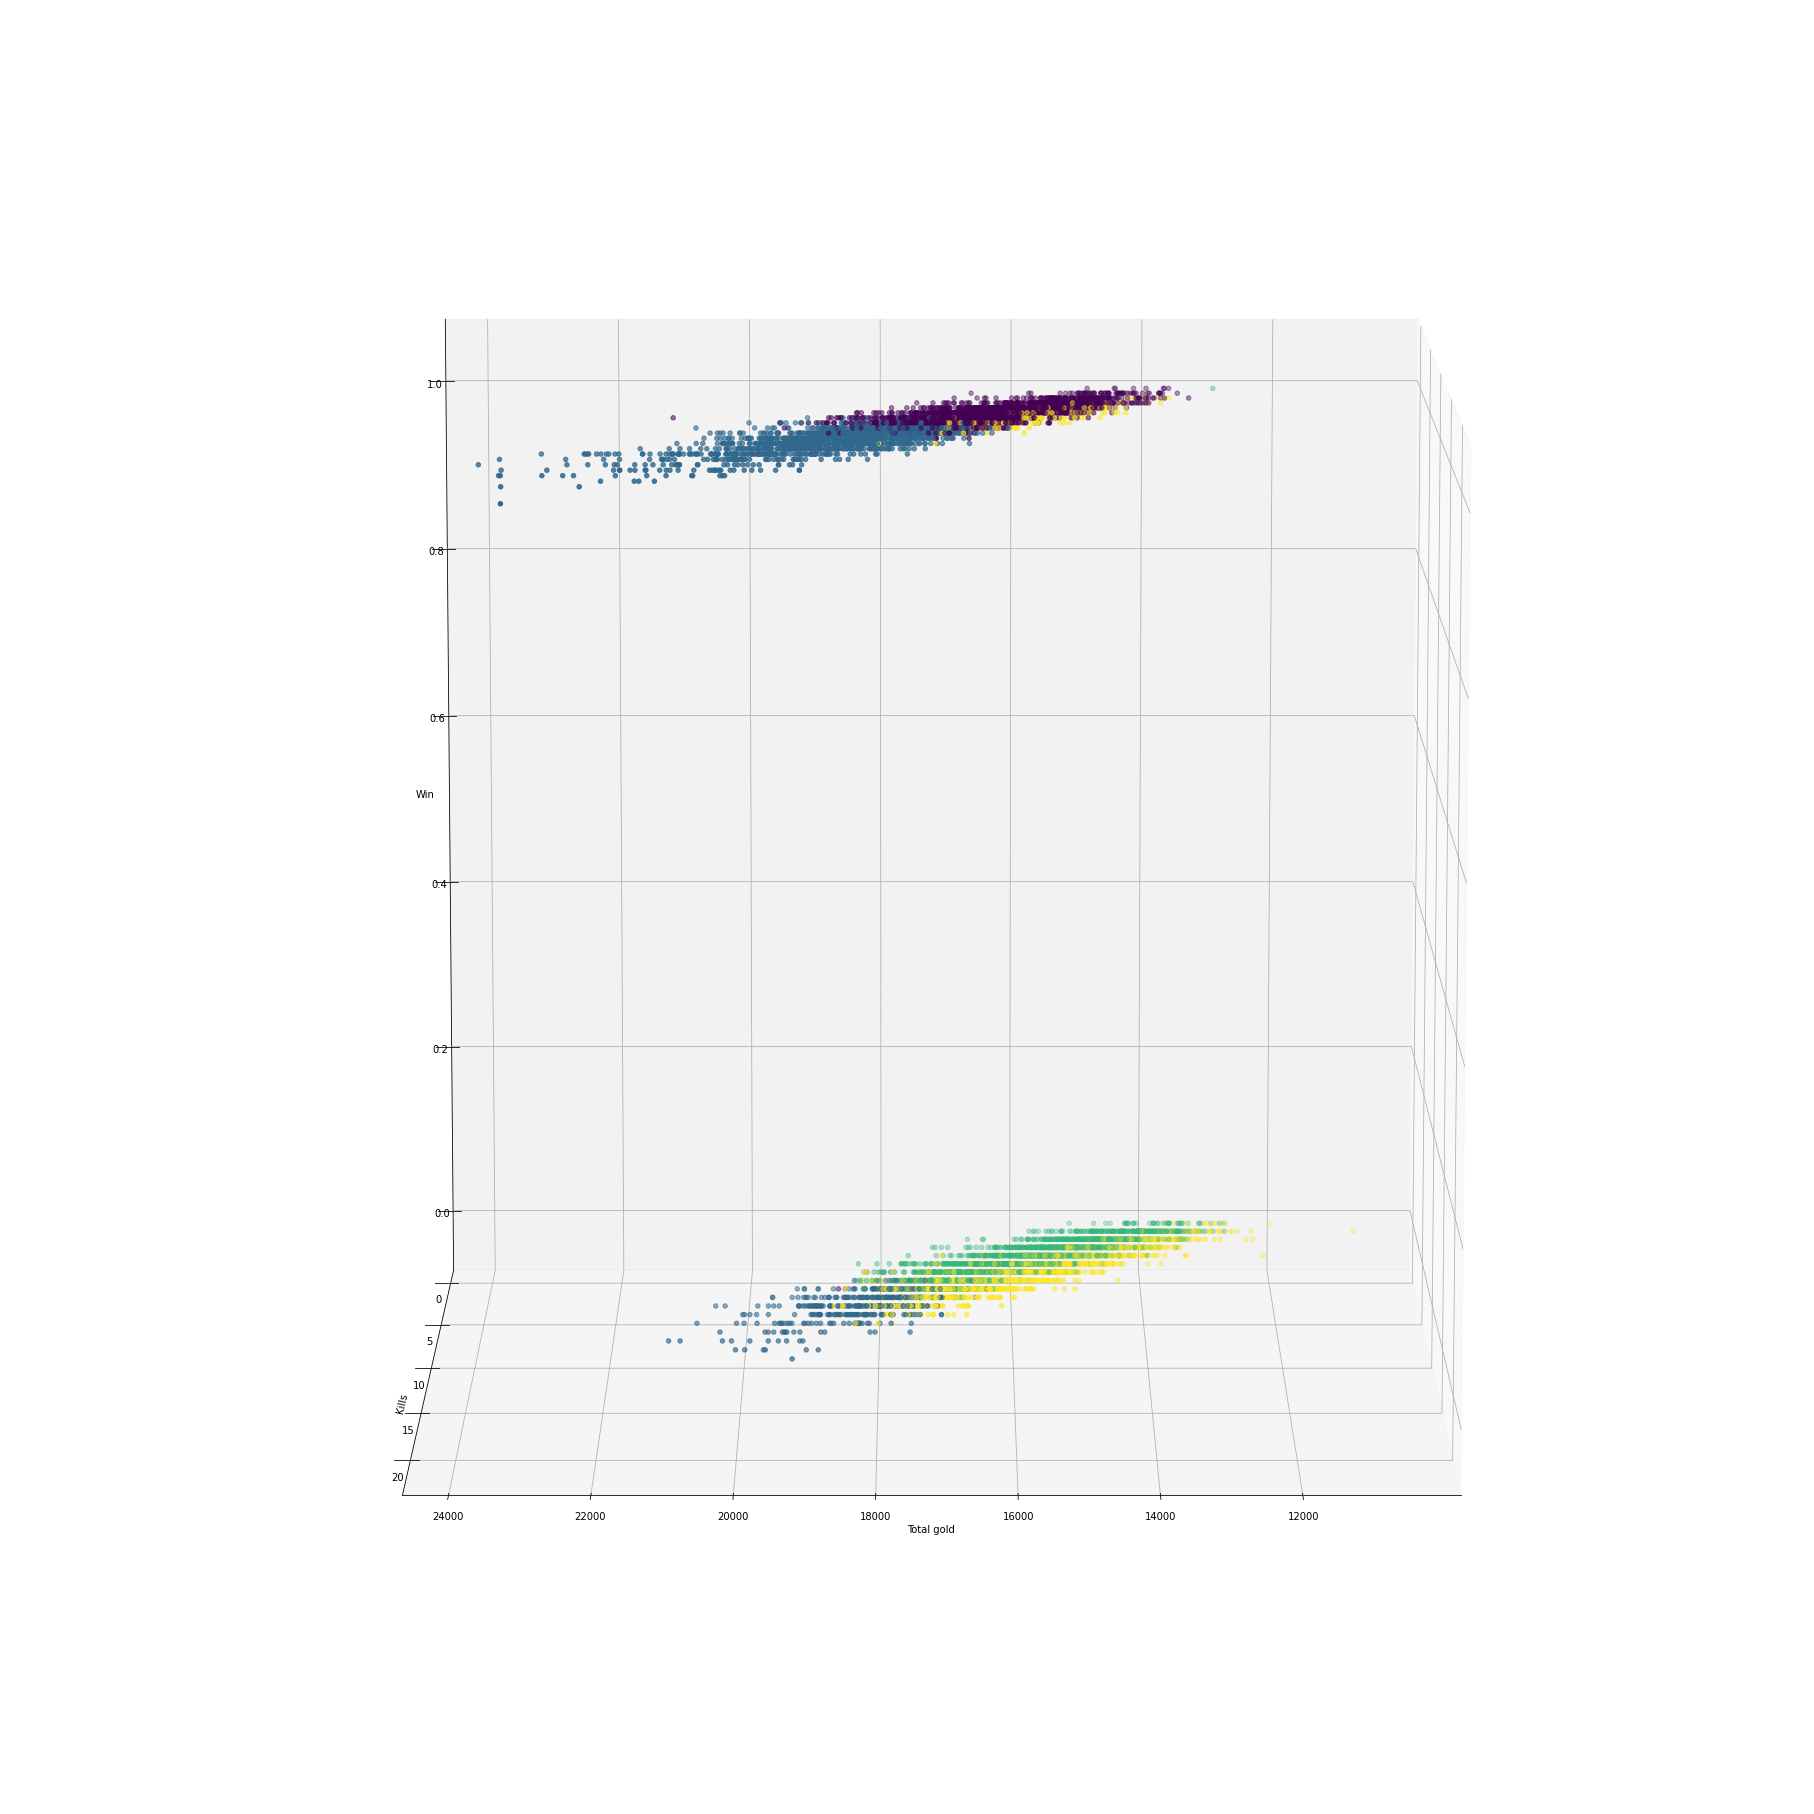

In [38]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(25,25))
ax = Axes3D(fig)
ax.scatter(rankeds['blueTotalGold'], rankeds['blueKills'], rankeds['blueWins'], c=km.labels_)
ax.set_xlabel('Total gold')
ax.set_ylabel('Kills')
ax.set_zlabel('Win')
ax.view_init(10, 90)
plt.show()

In [39]:
km = KMeans(n_clusters=5)
km.fit(rankeds_standarized)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [40]:
pd.DataFrame(scaler.inverse_transform(km.cluster_centers_), columns=rankeds_standarized.columns)

,Unnamed: 0,blueWins,blueWardsPlaced,blueKills,blueDeaths,blueAssists,blueTotalGold,blueTotalMinionsKilled
0,5209.062500,0.454545,96.227273,6.352273,6.394886,6.730114,16631.187500,214.073864
1,4869.513600,0.000400,19.324400,4.021200,5.523200,4.115600,15576.247600,223.618800
2,4917.746835,0.802532,19.850211,10.005907,5.667932,11.591561,18393.190295,218.718987
3,4975.078917,0.999619,19.724743,5.230652,4.440717,5.201296,16314.513534,226.642775
4,4955.907080,0.120452,19.282203,5.588987,9.584071,5.837758,15662.738446,193.473943


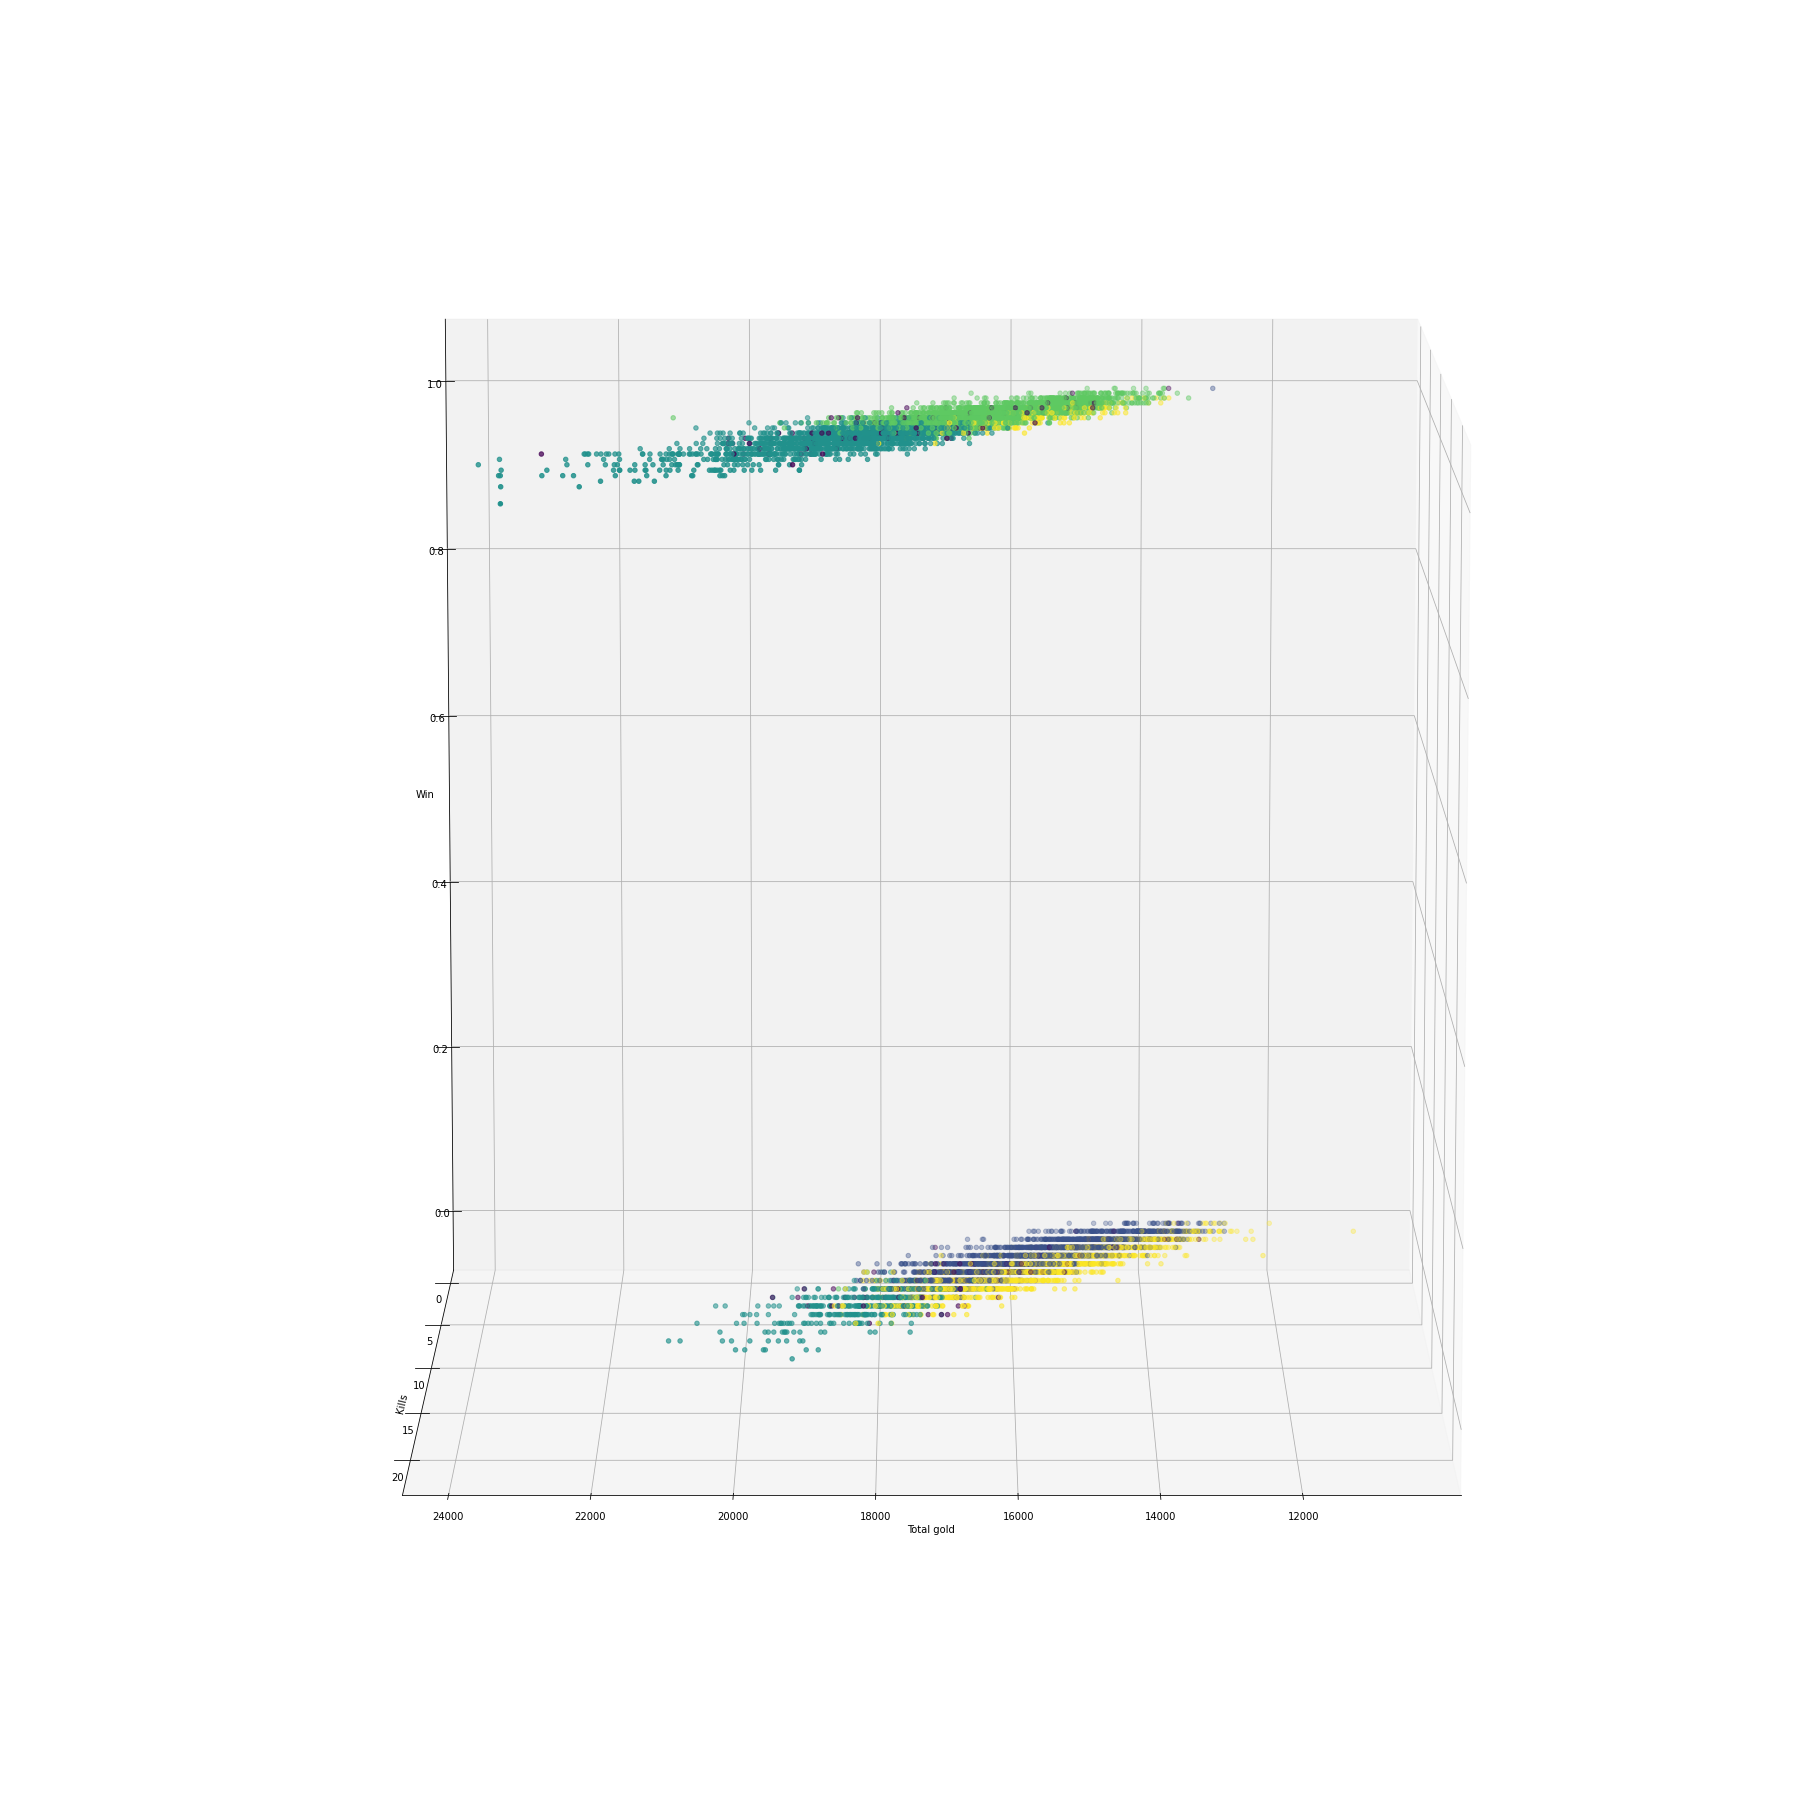

In [41]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(25,25))
ax = Axes3D(fig)
ax.scatter(rankeds['blueTotalGold'], rankeds['blueKills'], rankeds['blueWins'], c=km.labels_)
ax.set_xlabel('Total gold')
ax.set_ylabel('Kills')
ax.set_zlabel('Win')
ax.view_init(10, 90)
plt.show()

### Metoda aglomeracyjna

In [42]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
linkage_matrix_ward = linkage(rankeds, 'ward')

In [43]:
linkage_matrix_ward

array([[2.30500000e+03, 2.30800000e+03, 6.55743852e+00, 2.00000000e+00],
       [4.08000000e+03, 4.08100000e+03, 6.85565460e+00, 2.00000000e+00],
       [6.03300000e+03, 6.03500000e+03, 6.85565460e+00, 2.00000000e+00],
       ...,
       [1.97490000e+04, 1.97510000e+04, 1.02622373e+05, 3.73700000e+03],
       [1.97520000e+04, 1.97540000e+04, 1.85757930e+05, 6.59500000e+03],
       [1.97530000e+04, 1.97550000e+04, 3.24760537e+05, 9.87900000e+03]])

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [25.0, 25.0, 35.0, 35.0],
  [10.0, 10.0, 30.0, 30.0],
  [55.0, 55.0, 65.0, 65.0],
  [45.0, 45.0, 60.0, 60.0],
  [20.0, 20.0, 52.5, 52.5],
  [85.0, 85.0, 95.0, 95.0],
  [75.0, 75.0, 90.0, 90.0],
  [115.0, 115.0, 125.0, 125.0],
  [105.0, 105.0, 120.0, 120.0],
  [82.5, 82.5, 112.5, 112.5],
  [135.0, 135.0, 145.0, 145.0],
  [185.0, 185.0, 195.0, 195.0],
  [175.0, 175.0, 190.0, 190.0],
  [165.0, 165.0, 182.5, 182.5],
  [155.0, 155.0, 173.75, 173.75],
  [140.0, 140.0, 164.375, 164.375],
  [97.5, 97.5, 152.1875, 152.1875],
  [36.25, 36.25, 124.84375, 124.84375],
  [205.0, 205.0, 215.0, 215.0],
  [245.0, 245.0, 255.0, 255.0],
  [235.0, 235.0, 250.0, 250.0],
  [225.0, 225.0, 242.5, 242.5],
  [210.0, 210.0, 233.75, 233.75],
  [265.0, 265.0, 275.0, 275.0],
  [295.0, 295.0, 305.0, 305.0],
  [285.0, 285.0, 300.0, 300.0],
  [270.0, 270.0, 292.5, 292.5],
  [221.875, 221.875, 281.25, 281.25],
  [325.0, 325.0, 335.0, 335.0],
  [315.0, 315.0, 330.0, 330.0],
  [345.0

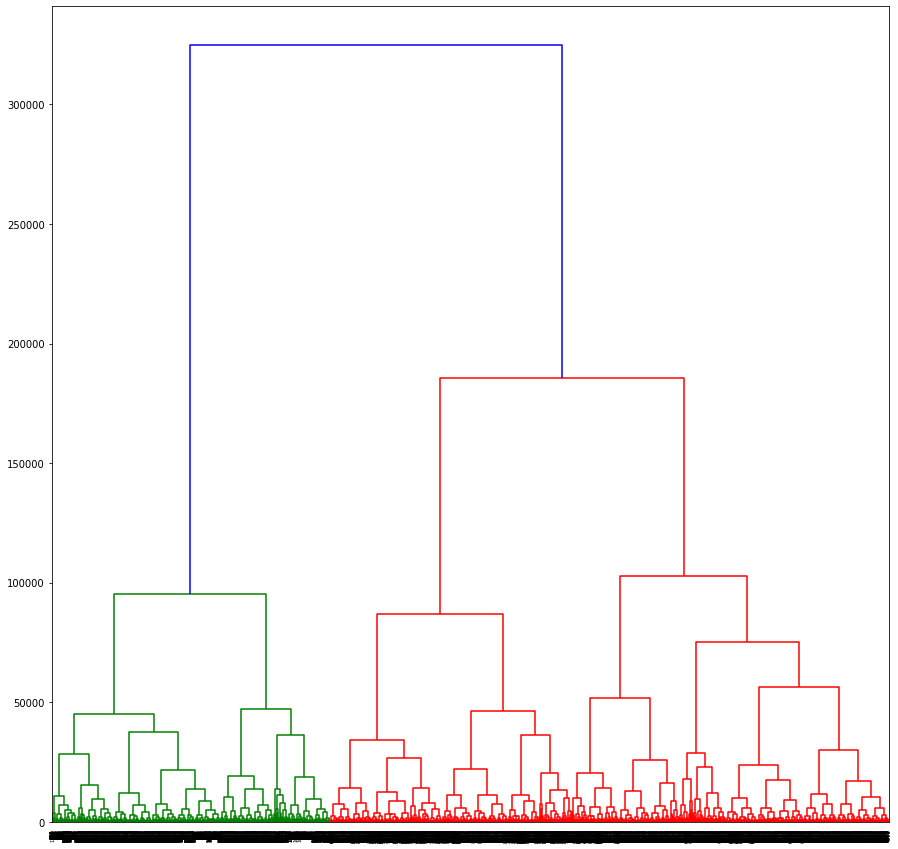

In [44]:
plt.figure(figsize=(15,15))
dendrogram(linkage_matrix_ward)

{'icoord': [[45.0, 45.0, 55.0, 55.0],
  [75.0, 75.0, 85.0, 85.0],
  [105.0, 105.0, 115.0, 115.0],
  [135.0, 135.0, 145.0, 145.0],
  [125.0, 125.0, 140.0, 140.0],
  [155.0, 155.0, 165.0, 165.0],
  [175.0, 175.0, 185.0, 185.0],
  [215.0, 215.0, 225.0, 225.0],
  [235.0, 235.0, 245.0, 245.0],
  [275.0, 275.0, 285.0, 285.0],
  [315.0, 315.0, 325.0, 325.0],
  [305.0, 305.0, 320.0, 320.0],
  [295.0, 295.0, 312.5, 312.5],
  [280.0, 280.0, 303.75, 303.75],
  [335.0, 335.0, 345.0, 345.0],
  [291.875, 291.875, 340.0, 340.0],
  [265.0, 265.0, 315.9375, 315.9375],
  [255.0, 255.0, 290.46875, 290.46875],
  [365.0, 365.0, 375.0, 375.0],
  [355.0, 355.0, 370.0, 370.0],
  [405.0, 405.0, 415.0, 415.0],
  [395.0, 395.0, 410.0, 410.0],
  [385.0, 385.0, 402.5, 402.5],
  [362.5, 362.5, 393.75, 393.75],
  [445.0, 445.0, 455.0, 455.0],
  [435.0, 435.0, 450.0, 450.0],
  [425.0, 425.0, 442.5, 442.5],
  [485.0, 485.0, 495.0, 495.0],
  [475.0, 475.0, 490.0, 490.0],
  [465.0, 465.0, 482.5, 482.5],
  [545.0, 545.0,

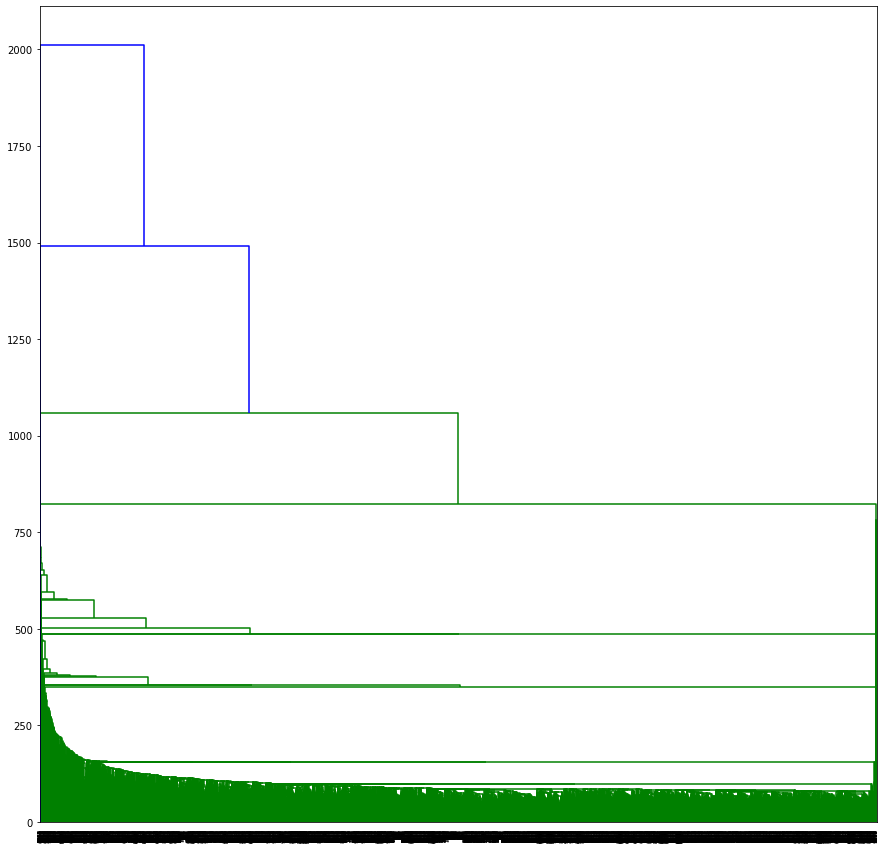

In [45]:
linkage_matrix_single = linkage(rankeds, 'single')
plt.figure(figsize=(15,15))
dendrogram(linkage_matrix_single)

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [25.0, 25.0, 35.0, 35.0],
  [10.0, 10.0, 30.0, 30.0],
  [65.0, 65.0, 75.0, 75.0],
  [55.0, 55.0, 70.0, 70.0],
  [95.0, 95.0, 105.0, 105.0],
  [85.0, 85.0, 100.0, 100.0],
  [62.5, 62.5, 92.5, 92.5],
  [45.0, 45.0, 77.5, 77.5],
  [20.0, 20.0, 61.25, 61.25],
  [115.0, 115.0, 125.0, 125.0],
  [135.0, 135.0, 145.0, 145.0],
  [120.0, 120.0, 140.0, 140.0],
  [165.0, 165.0, 175.0, 175.0],
  [155.0, 155.0, 170.0, 170.0],
  [130.0, 130.0, 162.5, 162.5],
  [195.0, 195.0, 205.0, 205.0],
  [185.0, 185.0, 200.0, 200.0],
  [215.0, 215.0, 225.0, 225.0],
  [255.0, 255.0, 265.0, 265.0],
  [245.0, 245.0, 260.0, 260.0],
  [235.0, 235.0, 252.5, 252.5],
  [220.0, 220.0, 243.75, 243.75],
  [192.5, 192.5, 231.875, 231.875],
  [146.25, 146.25, 212.1875, 212.1875],
  [40.625, 40.625, 179.21875, 179.21875],
  [285.0, 285.0, 295.0, 295.0],
  [315.0, 315.0, 325.0, 325.0],
  [305.0, 305.0, 320.0, 320.0],
  [290.0, 290.0, 312.5, 312.5],
  [275.0, 275.0, 301.25, 301.25],
  [345.0

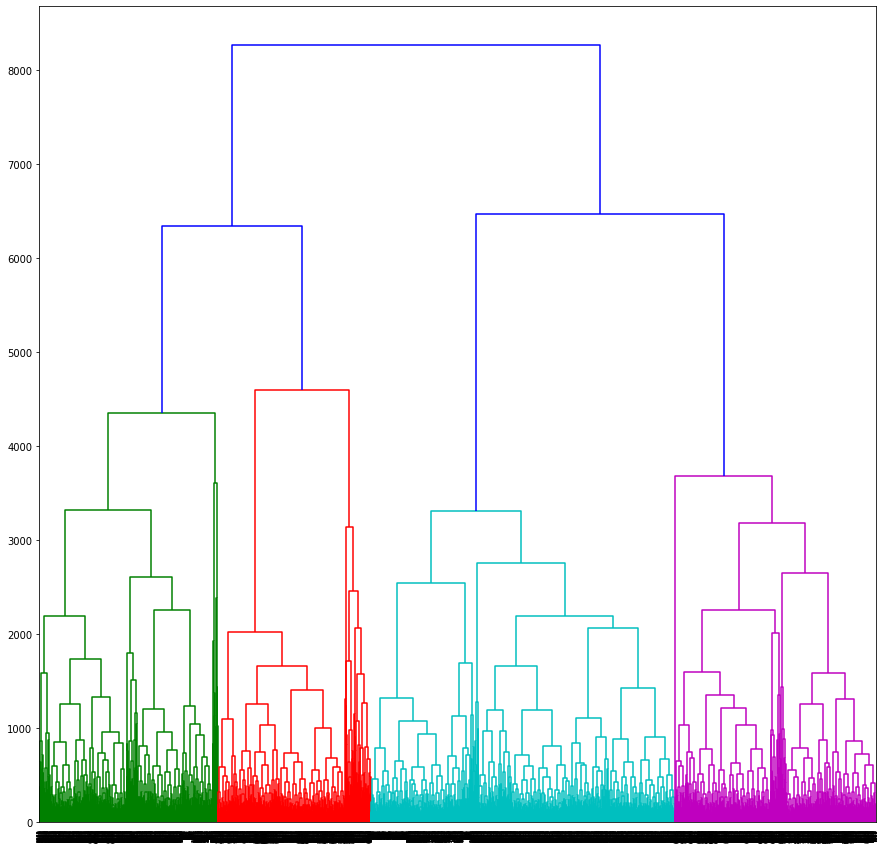

In [46]:
linkage_matrix_weighted = linkage(rankeds, 'weighted')
plt.figure(figsize=(15,15))
dendrogram(linkage_matrix_weighted)


In [47]:
methods = ['ward', 'single', 'weighted']
scores = []
for method in ['ward', 'single', 'weighted']:
    linkage_matrix = linkage(rankeds_standarized, method)
    predictions = fcluster(linkage_matrix, t=3, criterion='maxclust')
    score = silhouette_score(rankeds_standarized, predictions)
    scores.append(score)
    print('Method: {} score: {}'.format(method, score))



Method: ward score: 0.16290623867197587
Method: single score: 0.6857183024915962
Method: weighted score: 0.3952045753198105


<BarContainer object of 3 artists>

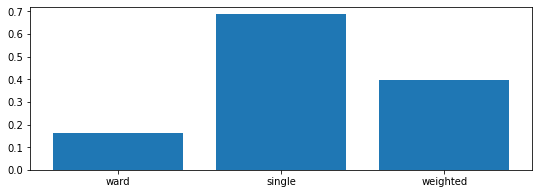

In [48]:
plt.figure(figsize=(9,3))
plt.bar(methods,scores)

In [49]:
class_count = fcluster(linkage_matrix_single, t=3, criterion='maxclust') ## CHANGE NAME

In [50]:
centers_aglo = rankeds_standarized.groupby(class_count).mean()
centers_aglo_df = pd.DataFrame(scaler.inverse_transform(centers_aglo))
centers_aglo_df.columns = rankeds_standarized.columns
centers_aglo_df


,Unnamed: 0,blueWins,blueWardsPlaced,blueKills,blueDeaths,blueAssists,blueTotalGold,blueTotalMinionsKilled
0,4939.176977,0.499038,22.289764,6.183355,6.136681,6.64392,16503.348385,216.705072
1,767.000000,1.000000,16.000000,17.000000,10.000000,25.00000,23335.000000,239.000000
2,7363.000000,0.000000,14.000000,1.000000,12.000000,0.00000,10730.000000,140.000000


### Grupowanie k-modes

In [51]:
rankeds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 8 columns):
Unnamed: 0                9879 non-null int64
blueWins                  9879 non-null int64
blueWardsPlaced           9879 non-null int64
blueKills                 9879 non-null int64
blueDeaths                9879 non-null int64
blueAssists               9879 non-null int64
blueTotalGold             9879 non-null int64
blueTotalMinionsKilled    9879 non-null int64
dtypes: int64(8)
memory usage: 617.6 KB


In [52]:
rankeds['blueTotalGold'].max()


23701

In [53]:
pd.cut(rankeds['blueTotalGold'], [0, 5000, 10000, 15000, 20000, 25000])

0       (15000, 20000]
1       (10000, 15000]
2       (15000, 20000]
3       (15000, 20000]
4       (15000, 20000]
             ...      
9874    (15000, 20000]
9875    (15000, 20000]
9876    (15000, 20000]
9877    (10000, 15000]
9878    (15000, 20000]
Name: blueTotalGold, Length: 9879, dtype: category
Categories (5, interval[int64]): [(0, 5000] < (5000, 10000] < (10000, 15000] < (15000, 20000] < (20000, 25000]]

In [54]:
rankeds['blueTotalGoldCategorized'] = pd.cut(rankeds['blueTotalGold'], [0,5000,10000,15000,20000,25000])
rankeds['blueTotalGoldCategorized']

0       (15000, 20000]
1       (10000, 15000]
2       (15000, 20000]
3       (15000, 20000]
4       (15000, 20000]
             ...      
9874    (15000, 20000]
9875    (15000, 20000]
9876    (15000, 20000]
9877    (10000, 15000]
9878    (15000, 20000]
Name: blueTotalGoldCategorized, Length: 9879, dtype: category
Categories (5, interval[int64]): [(0, 5000] < (5000, 10000] < (10000, 15000] < (15000, 20000] < (20000, 25000]]

In [55]:
rankeds_cat = rankeds[['blueTotalGoldCategorized', 'blueWins', 'blueWardsPlaced', 'blueKills', 'blueDeaths', 'blueAssists', 'blueTotalMinionsKilled']]

In [56]:
rankeds_cat['blueTotalGoldCategorized'].describe()

count               9879
unique                 3
top       (15000, 20000]
freq                8078
Name: blueTotalGoldCategorized, dtype: object

In [57]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
rankeds_processed = rankeds_cat.apply(le.fit_transform)

In [58]:
rankeds_processed

,blueTotalGoldCategorized,blueWins,blueWardsPlaced,blueKills,blueDeaths,blueAssists,blueTotalMinionsKilled
0,1,0,22,9,6,11,63
1,0,0,6,5,5,5,42
2,1,0,9,7,11,4,54
3,1,0,37,4,5,5,69
4,1,0,69,6,6,6,78
...,...,...,...,...,...,...,...
9874,1,1,11,7,4,5,79
9875,1,1,48,6,4,8,101
9876,1,0,17,6,7,5,78
9877,0,0,8,2,3,3,92


In [59]:
from kmodes.kmodes import KModes

In [60]:
cost = []
for clusters in list(range(1,5)):
    kmode = KModes(n_clusters=clusters, init = "Huang", n_init = 1, verbose=1)
    kmode.fit_predict(rankeds_processed)
    cost.append(kmode.cost_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 50947.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 781, cost: 45810.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1370, cost: 43952.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1107, cost: 42403.0


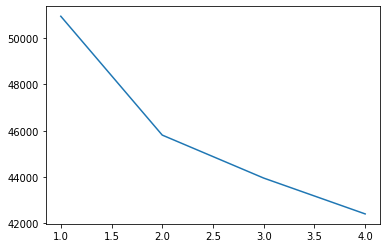

In [61]:
y = np.array([i for i in range(1,5,1)])
plt.plot(y,cost)

In [62]:
km_kmodes = KModes(n_clusters=2, init = "Huang", n_init = 5, verbose=1)
fitClusters_huang = km_kmodes.fit_predict(rankeds_processed)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 602, cost: 46002.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 3245, cost: 45625.0
Run 2, iteration: 2/100, moves: 482, cost: 45625.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 3369, cost: 45340.0
Run 3, iteration: 2/100, moves: 678, cost: 45294.0
Run 3, iteration: 3/100, moves: 22, cost: 45294.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 3209, cost: 45746.0
Run 4, iteration: 2/100, moves: 314, cost: 45746.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 3149, cost: 45548.0
Best run was number 3


In [63]:
km_kmodes.cluster_centroids_

array([[ 1,  0, 10,  5,  5,  4, 86],
       [ 1,  1,  9,  7,  4,  8, 97]], dtype=int64)

In [64]:
rankeds_processed = rankeds_cat.reset_index()
clustersDf = pd.DataFrame(fitClusters_huang)
clustersDf.columns = ['cluster_predicted']
combinedDf = pd.concat([rankeds_processed, clustersDf], axis = 1).reset_index()
combinedDf = combinedDf.drop(['index', 'level_0'], axis = 1)

combinedDf.head()

,blueTotalGoldCategorized,blueWins,blueWardsPlaced,blueKills,blueDeaths,blueAssists,blueTotalMinionsKilled,cluster_predicted
0,"(15000, 20000]",0,28,9,6,11,195,0
1,"(10000, 15000]",0,12,5,5,5,174,0
2,"(15000, 20000]",0,15,7,11,4,186,0
3,"(15000, 20000]",0,43,4,5,5,201,0
4,"(15000, 20000]",0,75,6,6,6,210,0


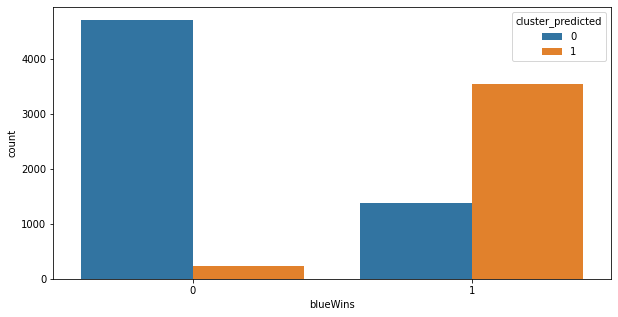

In [65]:
plt.subplots(figsize = (10,5))
sns.countplot(x=combinedDf['blueWins'],order=combinedDf['blueWins'].value_counts().index,hue=combinedDf['cluster_predicted'])
plt.show()

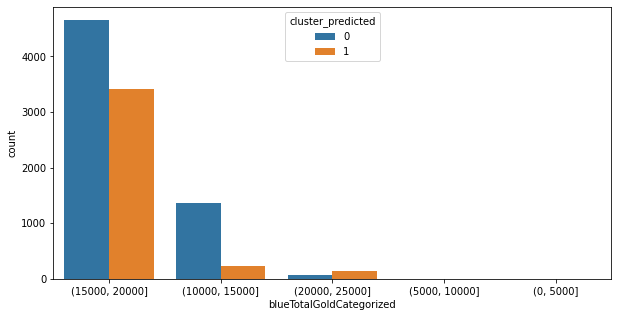

In [66]:
plt.subplots(figsize = (10,5))
sns.countplot(x=combinedDf['blueTotalGoldCategorized'],order=combinedDf['blueTotalGoldCategorized'].value_counts().index,hue=combinedDf['cluster_predicted'])
plt.show()

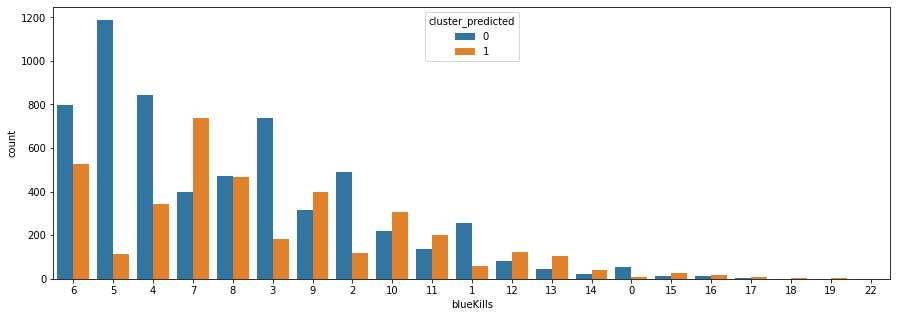

In [67]:
plt.subplots(figsize = (15,5))
sns.countplot(x=combinedDf['blueKills'],order=combinedDf['blueKills'].value_counts().index,hue=combinedDf['cluster_predicted'])
plt.show()

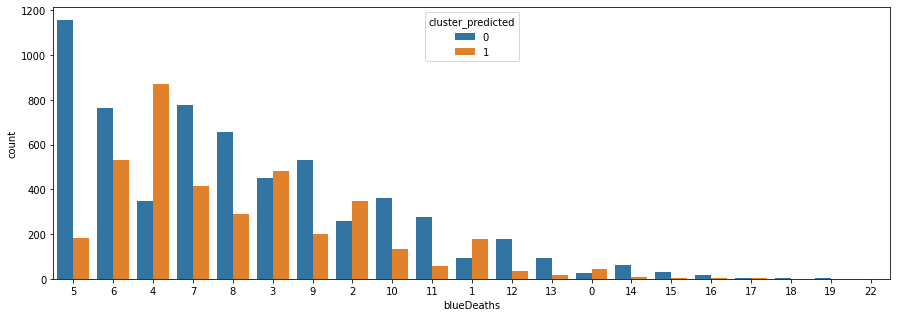

In [68]:
plt.subplots(figsize = (15,5))
sns.countplot(x=combinedDf['blueDeaths'],order=combinedDf['blueDeaths'].value_counts().index,hue=combinedDf['cluster_predicted'])
plt.show()

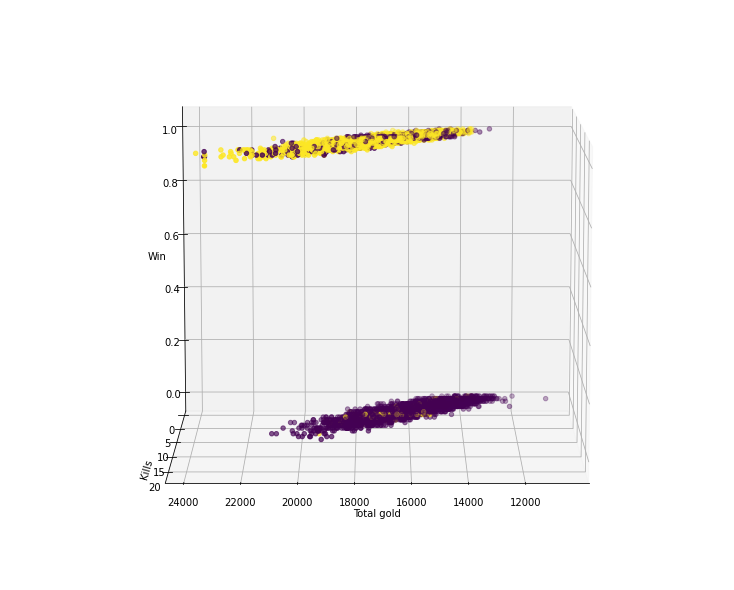

In [69]:
fig = plt.figure(figsize=(10,8))
ax = Axes3D(fig)

ax.scatter(
    rankeds['blueTotalGold'], rankeds['blueKills'], rankeds['blueWins'],
    c=clustersDf
)
ax.set_xlabel('Total gold')
ax.set_ylabel('Kills')
ax.set_zlabel('Win')
ax.view_init(10, 90)
plt.show()

### DBSCAN

In [70]:
rankeds_refresh = rankeds.drop('blueTotalGoldCategorized', axis=1)
rankeds_refresh.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 8 columns):
Unnamed: 0                9879 non-null int64
blueWins                  9879 non-null int64
blueWardsPlaced           9879 non-null int64
blueKills                 9879 non-null int64
blueDeaths                9879 non-null int64
blueAssists               9879 non-null int64
blueTotalGold             9879 non-null int64
blueTotalMinionsKilled    9879 non-null int64
dtypes: int64(8)
memory usage: 617.6 KB


In [71]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [72]:
scaler = StandardScaler()
rankeds_refresh[rankeds_refresh.columns] = scaler.fit_transform(rankeds_refresh)
clusters = DBSCAN(eps=2, min_samples=20).fit_predict(rankeds_refresh[rankeds_refresh.columns])

In [73]:
clusters

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

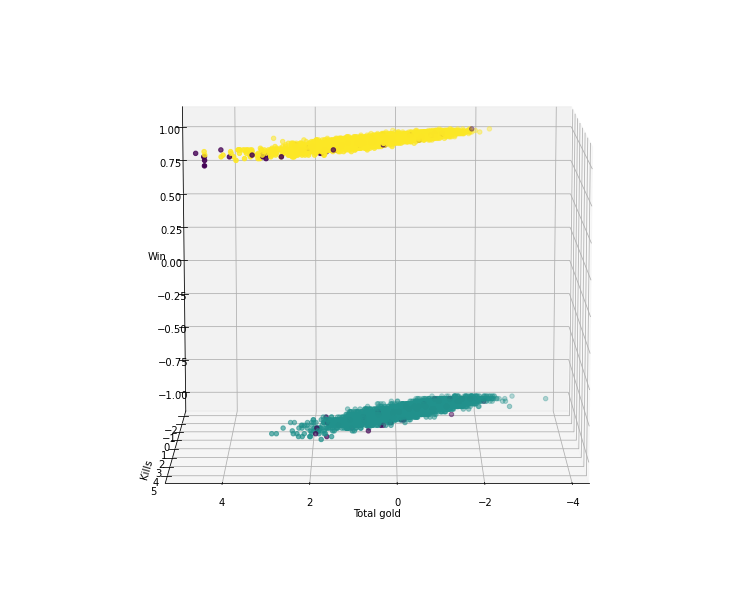

In [74]:
fig = plt.figure(figsize=(10,8))
ax = Axes3D(fig)

ax.scatter(
    rankeds_refresh['blueTotalGold'], rankeds_refresh['blueKills'], rankeds_refresh['blueWins'],
    c=clusters
)
ax.set_xlabel('Total gold')
ax.set_ylabel('Kills')
ax.set_zlabel('Win')
ax.view_init(10, 90)
plt.show()
